In [2]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [9]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# Drop NaN values from the salary_year_avg column for accurate visualisation
df_DA_US =df_DA_US.dropna(subset=["salary_year_avg"])

In [12]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_US[["salary_year_avg", "job_skills"]]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [16]:
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

In [26]:
df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


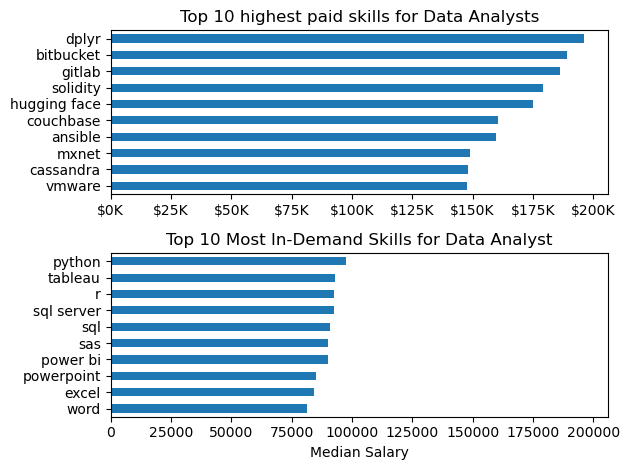

In [41]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 highest paid skills for Data Analysts")  #data seemed really bad anyway
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst")  #data seemed really bad anyway
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout() # couldn't think of this for a few moments